In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("E:/output/outbreak1.csv") #Reading the dataset in a dataframe using Pandas

In [2]:
# this cell is important as this help us to enocode the values of columns
# we need to enode explicity because the cuurent sklearn will encode the single columns and we need multiple columns to enode

def encode(col):
    col = sorted(list(set(col)))
    col_dict = dict()
    for i,value in enumerate(col):
        col_dict[value] = i    
    return col_dict

def decode(encoded_dict):
    decode = {v: k for k, v in encoded_dict.items()}
    return(decode)
    

Month_encode = encode(df['Month'])
State_encode = encode(df['State'])
Location_encode = encode(df['Location'])
Species_encode = encode(df['Species'])
Status_encode = encode(df['Status'])
        

In [3]:
# encode = LabelEncoder()
#change the column value to encoded column value
df['Month']=df['Month'].replace(Month_encode)
df['State']=df['State'].replace(State_encode)
df['Location']=df['Location'].replace(Location_encode) 
df['Species']=df['Species'].replace(Species_encode)
df['Status']=df['Status'].replace(Status_encode)

In [4]:
df.head()

,Unnamed: 0,Year,Month,State,Location,Species,Status,Illnesses,Hospitalizations,Fatalities
0,3,1998,4,4,87,66,0,4,0,0
1,4,1998,4,4,59,59,0,26,3,0
2,5,1998,4,4,87,68,0,25,3,0
3,7,1998,4,4,87,59,0,4,3,0
4,15,1998,4,8,87,25,1,3,0,0


In [5]:
# define X and y
feature_cols = ['State', 'Month', 'Location', 'Species','Hospitalizations','Fatalities']

# X is a matrix, hence we use [] to access the features we want in feature_cols
X = df[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = df.Status

In [6]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [7]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
# instantiate model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [9]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7123655913978495


In [10]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    1236
1     624
Name: Status, dtype: int64

In [11]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()

0.33548387096774196

In [12]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6645161290322581

In [13]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

0.6645161290322581

In [14]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.664516
Name: Status, dtype: float64

In [15]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1]
False: [0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [16]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[1097  139]
 [ 396  228]]


In [17]:
# print the first 25 true and predicted responses
print('True', y_test.values[0:25])
print('Pred', y_pred_class[0:25])

True [0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1]
Pred [0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [18]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[1097  139]
 [ 396  228]]


In [19]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7123655913978495
0.7123655913978495


In [20]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.28763440860215056
0.2876344086021505


In [21]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.36538461538461536
0.36538461538461536


In [22]:
specificity = TN / (TN + FP)

print(specificity)

0.8875404530744336


In [23]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.11245954692556634
0.11245954692556637


In [24]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.6212534059945504
0.6212534059945504


In [25]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [26]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10]

array([[7.24393484e-01, 2.75606516e-01],
       [6.62355450e-01, 3.37644550e-01],
       [7.28718743e-01, 2.71281257e-01],
       [6.92358023e-01, 3.07641977e-01],
       [6.58709460e-01, 3.41290540e-01],
       [7.15222755e-01, 2.84777245e-01],
       [3.32220394e-01, 6.67779606e-01],
       [4.72476243e-01, 5.27523757e-01],
       [6.48225347e-01, 3.51774653e-01],
       [9.99571133e-01, 4.28866879e-04]])

In [27]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([2.75606516e-01, 3.37644550e-01, 2.71281257e-01, 3.07641977e-01,
       3.41290540e-01, 2.84777245e-01, 6.67779606e-01, 5.27523757e-01,
       3.51774653e-01, 4.28866879e-04])

In [28]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [29]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

Text(0,0.5,'Frequency')

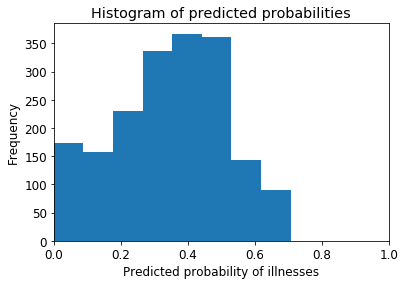

In [30]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of illnesses')
plt.ylabel('Frequency')

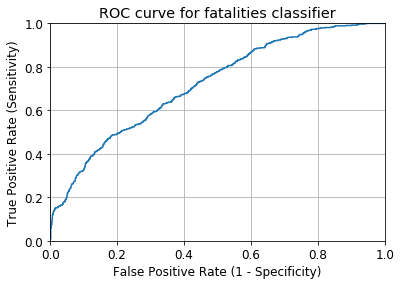

In [31]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fatalities classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [32]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [91]:
evaluate_threshold(0.6)

Sensitivity: 0.22435897435897437
Specificity: 0.9773462783171522


In [92]:
evaluate_threshold(0.4)

Sensitivity: 0.6362179487179487
Specificity: 0.7758899676375405


In [35]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7189036438884739


In [96]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

0.7144262453284955

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

In [65]:
# Instantiate
abc = AdaBoostClassifier(n_estimators=50, base_estimator=rm,learning_rate=1)

# Fit
abc.fit(X_train, y_train)

# Predict
y_pred = abc.predict(X_test)

# Accuracy
accuracy_score(y_pred, y_test)

0.7967741935483871

In [66]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    1236
1     624
Name: Status, dtype: int64

In [67]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()

0.33548387096774196

In [68]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6645161290322581

In [69]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.664516
Name: Status, dtype: float64

In [70]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred))

[[1091  145]
 [ 233  391]]


In [71]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
abc.predict(X_test)[0:10]

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [72]:
# print the first 10 predicted probabilities of class membership
abc.predict_proba(X_test)[0:5]

array([[0.51527902, 0.48472098],
       [0.46867585, 0.53132415],
       [0.49288715, 0.50711285],
       [0.47746396, 0.52253604],
       [0.50816426, 0.49183574]])

In [73]:
# print the first 10 predicted probabilities for class 1
abc.predict_proba(X_test)[0:10, 1]

array([0.48472098, 0.53132415, 0.50711285, 0.52253604, 0.49183574,
       0.49070445, 0.50981097, 0.49823923, 0.48203814, 0.3543807 ])

In [74]:
# store the predicted probabilities for class 1
y_pred_prob = abc.predict_proba(X_test)[:, 1]

Text(0,0.5,'Frequency')

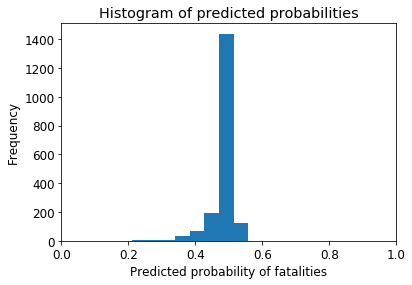

In [75]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of fatalities')
plt.ylabel('Frequency')

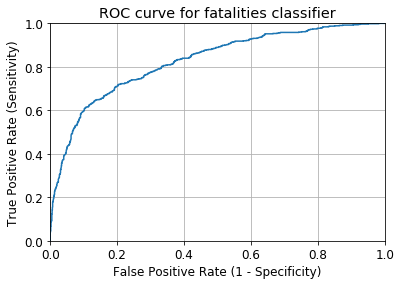

In [76]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fatalities classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [77]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

evaluate_threshold(0.5)  
# make class predictions for the testing set
y_pred_class = abc.predict(X_test)

evaluate_threshold(0.3)

# IMPORTANT: first argument is true values, second argument is predicted probabilities
print("ROC AUC score:")
print(metrics.roc_auc_score(y_test, y_pred))

print("Cross validated AUC score")
cross_val_score(abc, X, y, cv=10, scoring='roc_auc').mean()

Sensitivity: 0.6266025641025641
Specificity: 0.8826860841423948
Sensitivity: 1.0
Specificity: 0.01860841423948223
ROC AUC score:
0.7546443241224794
Cross validated AUC score


0.8144207800888867

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rm=RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
rm.fit(X_train, y_train)
# Predict
y_pred = rm.predict(X_test)

# Accuracy
accuracy_score(y_pred, y_test)

0.7521505376344086

In [80]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    1236
1     624
Name: Status, dtype: int64

In [81]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()

0.33548387096774196

In [82]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6645161290322581

In [83]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.664516
Name: Status, dtype: float64

In [84]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred))

[[1155   81]
 [ 380  244]]


In [85]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
rm.predict(X_test)[0:10]

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [86]:
# print the first 10 predicted probabilities of class membership
rm.predict_proba(X_test)[0:5]

array([[0.8179497 , 0.1820503 ],
       [0.32631361, 0.67368639],
       [0.53588465, 0.46411535],
       [0.46537644, 0.53462356],
       [0.51468611, 0.48531389]])

In [87]:
# print the first 10 predicted probabilities for class 1
rm.predict_proba(X_test)[0:10, 1]

array([0.1820503 , 0.67368639, 0.46411535, 0.53462356, 0.48531389,
       0.42922114, 0.77866978, 0.57350967, 0.2747414 , 0.03878101])

Text(0,0.5,'Frequency')

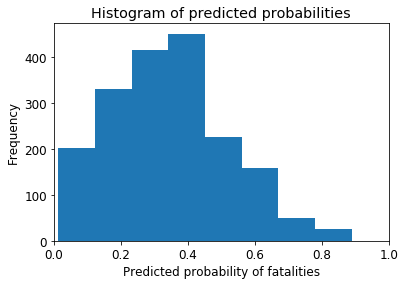

In [88]:
# store the predicted probabilities for class 1
y_pred_prob = rm.predict_proba(X_test)[:, 1]

# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of fatalities')
plt.ylabel('Frequency')

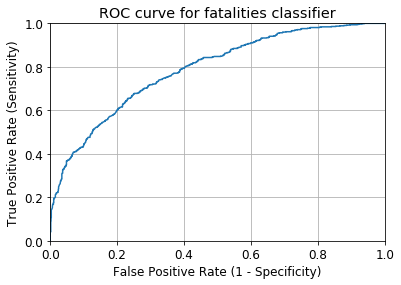

In [89]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fatalities classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [90]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

evaluate_threshold(0.5)  
# make class predictions for the testing set
y_pred_class = rm.predict(X_test)

evaluate_threshold(0.3)

# IMPORTANT: first argument is true values, second argument is predicted probabilities
print("ROC AUC score:")
print(metrics.roc_auc_score(y_test, y_pred))

print("Cross validated AUC score")
cross_val_score(rm, X, y, cv=10, scoring='roc_auc').mean()

Sensitivity: 0.391025641025641
Specificity: 0.9344660194174758
Sensitivity: 0.842948717948718
Specificity: 0.5299352750809061
ROC AUC score:
0.6627458302215583
Cross validated AUC score


0.7862983198009001

In [97]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

In [98]:
# Instantiate
abc = AdaBoostClassifier()

# Fit
abc.fit(X_train, y_train)

# Predict
y_pred = abc.predict(X_test)

# Accuracy
accuracy_score(y_pred, y_test)

0.7758064516129032

In [99]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    1236
1     624
Name: Status, dtype: int64

In [100]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()

0.33548387096774196

In [101]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6645161290322581

In [102]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.664516
Name: Status, dtype: float64

In [103]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred))

[[1086  150]
 [ 267  357]]


In [104]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
abc.predict(X_test)[0:10]

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [105]:
# print the first 10 predicted probabilities of class membership
abc.predict_proba(X_test)[0:5]

array([[0.50661917, 0.49338083],
       [0.48851852, 0.51148148],
       [0.49638697, 0.50361303],
       [0.49095525, 0.50904475],
       [0.49961675, 0.50038325]])

In [106]:
# print the first 10 predicted probabilities for class 1
abc.predict_proba(X_test)[0:10, 1]

array([0.49338083, 0.51148148, 0.50361303, 0.50904475, 0.50038325,
       0.49842296, 0.51203991, 0.5008533 , 0.49036841, 0.31009439])

In [107]:
# store the predicted probabilities for class 1
y_pred_prob = abc.predict_proba(X_test)[:, 1]

Text(0,0.5,'Frequency')

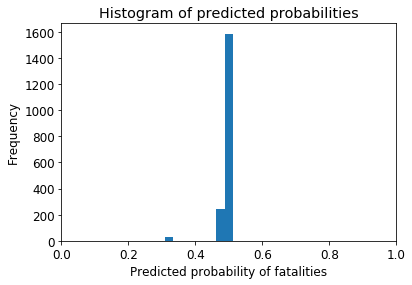

In [108]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of fatalities')
plt.ylabel('Frequency')

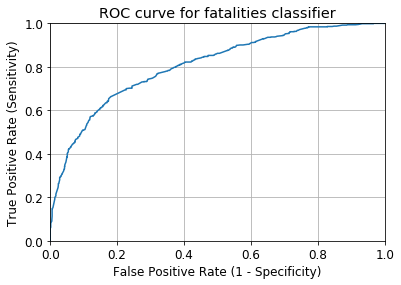

In [109]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fatalities classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [110]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

evaluate_threshold(0.5)  
# make class predictions for the testing set
y_pred_class = abc.predict(X_test)

evaluate_threshold(0.3)

# IMPORTANT: first argument is true values, second argument is predicted probabilities
print("ROC AUC score:")
print(metrics.roc_auc_score(y_test, y_pred))

print("Cross validated AUC score")
cross_val_score(abc, X, y, cv=10, scoring='roc_auc').mean()

Sensitivity: 0.5721153846153846
Specificity: 0.8786407766990292
Sensitivity: 1.0
Specificity: 0.0
ROC AUC score:
0.7253780806572069
Cross validated AUC score


0.8123359503394006

In [112]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


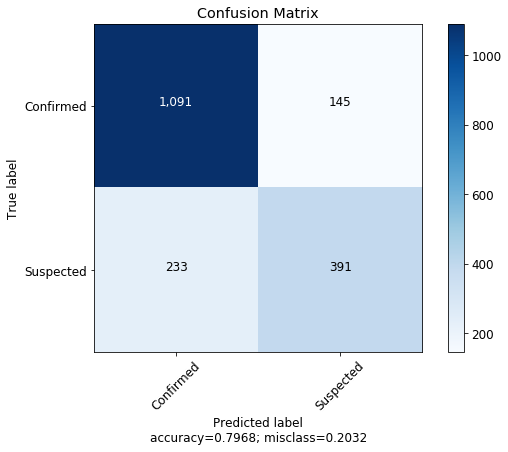

In [113]:
plot_confusion_matrix(cm           = np.array([[1091, 145], [233, 391]]), 
                      normalize    = False,
                      target_names = ['Confirmed', 'Suspected'],
                      title        = "Confusion Matrix")